[[111.3  22.2]
 [ 97.4  48.8]
 [148.1  77.7]
 ...
 [148.   33.3]
 [ 99.6  28.4]
 [149.8  35.1]]
0.728
[1]


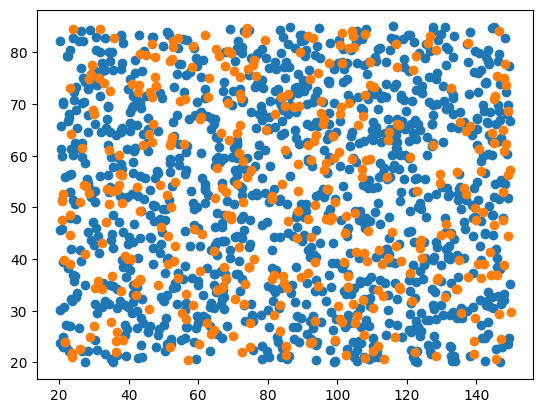

['xx.joblib']

In [191]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

csv = './samsung_heavy_welding_quality.csv'
df = pd.read_csv(csv)
# df

# data = ['torch_angle_deg',
#         'travel_speed_mm_s'
# ]

data = ['preheat_temp_C'
]
target = 'label_binary'



a = np.column_stack((np.array(df['spatter_count']), np.array(df['ndt_ultrasonic_db'])))
b = np.array(df[target])


train_input, test_input, train_target, test_target = train_test_split(
a, b)
# print(train_input)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))


# print(kn.predict([[71.6,59.6]]))

# mean = np.mean(train_input, axis=0) # 평균
# std = np.std(train_input, axis=0) # 표준편차

# print(mean, std)
# train_scaled = (train_input - mean) / std


import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
# plt.ylim((0, 80))
plt.show()

# kn.fit(train_scaled, train_target)
# test_scaled = (test_input - mean) / std
# kn.score(test_scaled, test_target)

import joblib
joblib.dump(kn, "xx.joblib")